In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r'E:\lung_disease_data.csv')
df.head()

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No  
4              NaN       Yes

In [2]:
df.tail()

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
5195  40.0    Male             No           1.43  Lung Cancer     Medication   
5196  21.0     NaN            Yes           1.50         COPD     Medication   
5197  42.0  Female             No           5.53    Pneumonia        Surgery   
5198  82.0    Male             No           3.68   Bronchitis     Medication   
5199  45.0  Female            Yes           3.79    Pneumonia     Medication   

      Hospital Visits Recovered  
5195              1.0       Yes  
5196              4.0        No  
5197              5.0        No  
5198              9.0        No  
5199             10.0       Yes

In [3]:
df.shape

(5200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [5]:
df.describe()

Age  Lung Capacity  Hospital Visits
count  4900.000000    4900.000000      4900.000000
mean     54.449796       3.501865         7.528571
std      20.126882       1.461179         3.996401
min      20.000000       1.000000         1.000000
25%      37.000000       2.220000         4.000000
50%      54.000000       3.480000         8.000000
75%      72.000000       4.800000        11.000000
max      89.000000       6.000000        14.000000

In [6]:
df.isnull().sum()

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [8]:
categorical_columns = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
unique_values = {col: df[col].unique() for col in categorical_columns}
df['Lung Capacity'].fillna(df['Lung Capacity'].mean(), inplace=True)
df['Hospital Visits'].fillna(df['Hospital Visits'].median(), inplace=True)
df['Treatment Type'].fillna(df['Treatment Type'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Recovered'].fillna(df['Recovered'].mode()[0], inplace=True)
df['Smoking Status'].fillna(df['Smoking Status'].mode()[0], inplace=True)
df['Disease Type'].fillna(df['Disease Type'].mode()[0], inplace=True)

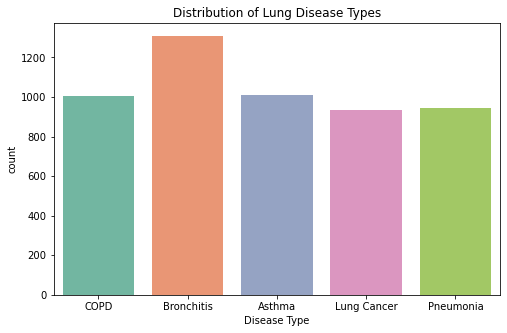

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Disease Type', data=df, palette='Set2')
plt.title('Distribution of Lung Disease Types')
plt.show()

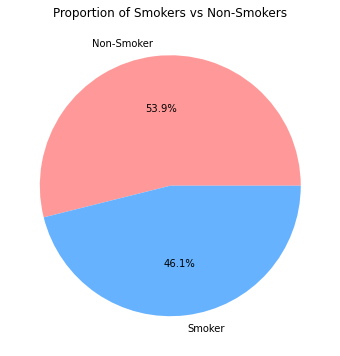

In [10]:
plt.figure(figsize=(6, 6))
df['Smoking Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF9999','#66B2FF'], labels=['Non-Smoker', 'Smoker'])
plt.title('Proportion of Smokers vs Non-Smokers')
plt.ylabel('')
plt.show()

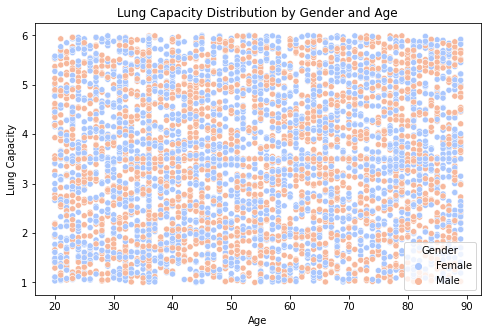

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Lung Capacity', hue='Gender', data=df, palette='coolwarm')
plt.title('Lung Capacity Distribution by Gender and Age')
plt.show()

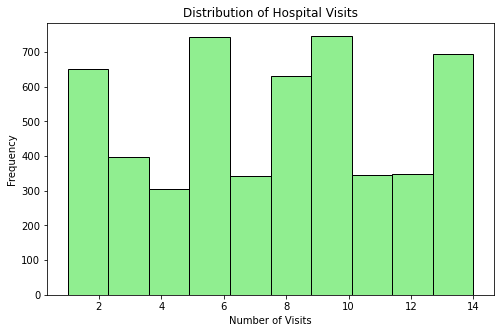

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(df['Hospital Visits'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Hospital Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.show()

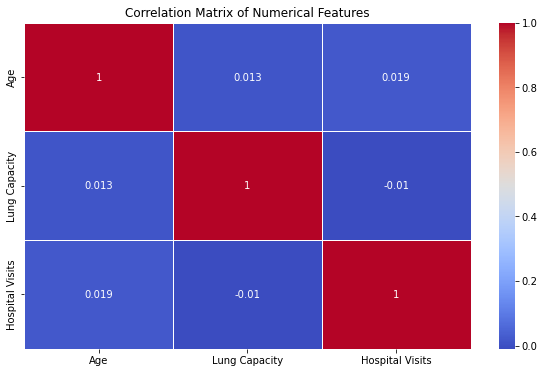

In [13]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_numerical = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_numerical, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()